In [9]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
#import tensorflow as tf
#gpus = tf.config.list_physical_devices("GPU")

In [10]:
data=pd.read_csv('cicids2017.csv')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692703 entries, 0 to 692702
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             692703 non-null  int64  
 1    Flow Duration                692703 non-null  int64  
 2    Total Fwd Packets            692703 non-null  int64  
 3    Total Backward Packets       692703 non-null  int64  
 4   Total Length of Fwd Packets   692703 non-null  int64  
 5    Total Length of Bwd Packets  692703 non-null  int64  
 6    Fwd Packet Length Max        692703 non-null  int64  
 7    Fwd Packet Length Min        692703 non-null  int64  
 8    Fwd Packet Length Mean       692703 non-null  float64
 9    Fwd Packet Length Std        692703 non-null  float64
 10  Bwd Packet Length Max         692703 non-null  int64  
 11   Bwd Packet Length Min        692703 non-null  int64  
 12   Bwd Packet Length Mean       692703 non-nul

In [12]:
data[' Label'].unique()

array(['BENIGN', 'DDoS slowloris', 'DDoS Slowhttptest', 'DDoS Hulk',
       'DDoS GoldenEye', 'Heartbleed'], dtype=object)

In [13]:
data = data[data[' Label'] != 'Heartbleed']

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 692692 entries, 0 to 692702
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             692692 non-null  int64  
 1    Flow Duration                692692 non-null  int64  
 2    Total Fwd Packets            692692 non-null  int64  
 3    Total Backward Packets       692692 non-null  int64  
 4   Total Length of Fwd Packets   692692 non-null  int64  
 5    Total Length of Bwd Packets  692692 non-null  int64  
 6    Fwd Packet Length Max        692692 non-null  int64  
 7    Fwd Packet Length Min        692692 non-null  int64  
 8    Fwd Packet Length Mean       692692 non-null  float64
 9    Fwd Packet Length Std        692692 non-null  float64
 10  Bwd Packet Length Max         692692 non-null  int64  
 11   Bwd Packet Length Min        692692 non-null  int64  
 12   Bwd Packet Length Mean       692692 non-null  fl

In [15]:
data[' Label'].unique()

array(['BENIGN', 'DDoS slowloris', 'DDoS Slowhttptest', 'DDoS Hulk',
       'DDoS GoldenEye'], dtype=object)

In [16]:
data[' Label'].value_counts()

 Label
BENIGN               440031
DDoS Hulk            231073
DDoS GoldenEye        10293
DDoS slowloris         5796
DDoS Slowhttptest      5499
Name: count, dtype: int64

In [17]:
import numpy as np

# Load the dataset
# Assuming 'data' is the DataFrame containing the dataset

# Identify NaN and infinite values
nan_values = data['Flow Bytes/s'].isna().sum()
inf_values_flow_bytes = np.isinf(data['Flow Bytes/s']).sum()
inf_values_flow_packets = np.isinf(data[' Flow Packets/s']).sum()

# Calculate median and maximum values
median_flow_bytes = data['Flow Bytes/s'].median()
max_flow_bytes = data['Flow Bytes/s'][~np.isinf(data['Flow Bytes/s'])].max()
max_flow_packets = data[' Flow Packets/s'][~np.isinf(data[' Flow Packets/s'])].max()

# Replace NaN and infinite values
#data['Flow Bytes/s'].fillna(median_flow_bytes, inplace=True)
#data['Flow Bytes/s'].replace(np.inf, max_flow_bytes, inplace=True)
#data[' Flow Packets/s'].replace(np.inf, max_flow_packets, inplace=True)
data['Flow Bytes/s'] = data['Flow Bytes/s'].fillna(median_flow_bytes)
data['Flow Bytes/s'] = data['Flow Bytes/s'].replace(np.inf, max_flow_bytes)
data[' Flow Packets/s'] = data[' Flow Packets/s'].replace(np.inf, max_flow_packets)


# Confirm the changes
updated_nan_values = data['Flow Bytes/s'].isna().sum()
updated_inf_values_flow_bytes = np.isinf(data['Flow Bytes/s']).sum()
updated_inf_values_flow_packets = np.isinf(data[' Flow Packets/s']).sum()

# Print summary
print(f"NaN values before: {nan_values}, after: {updated_nan_values}")
print(f"Infinite values (Flow Bytes/s) before: {inf_values_flow_bytes}, after: {updated_inf_values_flow_bytes}")
print(f"Infinite values (Flow Packets/s) before: {inf_values_flow_packets}, after: {updated_inf_values_flow_packets}")

NaN values before: 1008, after: 0
Infinite values (Flow Bytes/s) before: 289, after: 0
Infinite values (Flow Packets/s) before: 1297, after: 0


In [30]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
X = data.drop(columns=[' Label'])  # Assuming 'label' is the target variable
y = data[' Label']
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [31]:
X

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,4,32,0.0,0.0,0,0,0.0,0.0,0,0
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,3,32,0.0,0.0,0,0,0.0,0.0,0,0
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,10,32,0.0,0.0,0,0,0.0,0.0,0,0
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,2,32,0.0,0.0,0,0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692698,53,32215,4,2,112,152,28,28,28.000000,0.000000,...,3,20,0.0,0.0,0,0,0.0,0.0,0,0
692699,53,324,2,2,84,362,42,42,42.000000,0.000000,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
692700,58030,82,2,1,31,6,31,0,15.500000,21.920310,...,0,32,0.0,0.0,0,0,0.0,0.0,0,0
692701,53,1048635,6,2,192,256,32,32,32.000000,0.000000,...,5,20,0.0,0.0,0,0,0.0,0.0,0,0


In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
dt_classifier = DecisionTreeClassifier()

In [35]:
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [36]:
feature_importances = dt_classifier.feature_importances_

In [37]:
feature_importances

array([1.02786349e-01, 1.36604817e-04, 1.10597547e-05, 0.00000000e+00,
       4.37903755e-05, 2.95607242e-02, 7.69430510e-05, 2.43211740e-03,
       5.88598255e-04, 1.31355086e-05, 1.56540777e-03, 7.61935979e-06,
       2.53073407e-05, 4.97127589e-01, 2.86975494e-04, 4.73588259e-04,
       6.96531279e-02, 1.97761852e-03, 5.34002228e-05, 8.67811357e-03,
       2.44114985e-04, 1.62524424e-04, 4.90939444e-05, 1.42278812e-03,
       4.86488409e-03, 1.16968576e-05, 9.09405149e-07, 6.23891219e-03,
       5.71043764e-07, 3.55091180e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 9.12651457e-05, 1.45709167e-05,
       4.79641426e-04, 1.84211765e-02, 2.86175546e-05, 2.18040547e-03,
       2.01151196e-01, 1.86904156e-04, 7.56471814e-04, 2.09851168e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.81033199e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.84772821e-04, 1.69427211e-05, 5.69652069e-04, 8.22379580e-03,
      

In [38]:
mean_importance = feature_importances.mean()

In [39]:
mean_importance

0.012820512820512818

In [40]:
selected_features=[]
for i in range(len(feature_importances)):
    if(feature_importances[i]>mean_importance):
        selected_features.append(i)
selected_features

[0, 5, 13, 16, 37, 40]

In [41]:
#selected_features = [feature for feature, importance in enumerate(feature_importances) if importance >= mean_importance]

In [42]:
#selected_features

In [43]:
lst=[]
for i in selected_features:
    lst.append(data.columns[i])
lst

[' Destination Port',
 ' Total Length of Bwd Packets',
 ' Bwd Packet Length Std',
 ' Flow IAT Mean',
 ' Bwd Packets/s',
 ' Packet Length Mean']

In [44]:
# Load the dataset


# Define the indices to keep
indices_to_keep = [0, 13, 16, 37, 40, 65,78]

# Select columns based on indices to keep
selected_columns = data.columns[indices_to_keep]

# Create a new dataframe with only selected columns
new_df = data[selected_columns]

# Save the new dataframe
new_df

,Destination Port,Bwd Packet Length Std,Flow IAT Mean,Bwd Packets/s,Packet Length Mean,Subflow Bwd Bytes,Label
0,80,0.000000,38308.000000,26.104208,6.000000,6,BENIGN
1,389,89.278777,31.933333,10438.413360,29.294118,326,BENIGN
2,88,813.326503,73.000000,5479.452055,370.588235,3150,BENIGN
3,389,977.480342,543.071429,789.162173,337.066667,6660,BENIGN
4,88,813.842901,78.000000,5494.505495,393.875000,3152,BENIGN
...,...,...,...,...,...,...,...
692698,53,0.000000,6443.000000,62.082881,41.714286,152,BENIGN
692699,53,0.000000,108.000000,6172.839506,97.600000,362,BENIGN
692700,58030,0.000000,41.000000,12195.121950,17.000000,6,BENIGN
692701,53,0.000000,149805.000000,1.907241,53.333333,256,BENIGN


In [45]:
new_df

,Destination Port,Bwd Packet Length Std,Flow IAT Mean,Bwd Packets/s,Packet Length Mean,Subflow Bwd Bytes,Label
0,80,0.000000,38308.000000,26.104208,6.000000,6,BENIGN
1,389,89.278777,31.933333,10438.413360,29.294118,326,BENIGN
2,88,813.326503,73.000000,5479.452055,370.588235,3150,BENIGN
3,389,977.480342,543.071429,789.162173,337.066667,6660,BENIGN
4,88,813.842901,78.000000,5494.505495,393.875000,3152,BENIGN
...,...,...,...,...,...,...,...
692698,53,0.000000,6443.000000,62.082881,41.714286,152,BENIGN
692699,53,0.000000,108.000000,6172.839506,97.600000,362,BENIGN
692700,58030,0.000000,41.000000,12195.121950,17.000000,6,BENIGN
692701,53,0.000000,149805.000000,1.907241,53.333333,256,BENIGN


In [53]:
import pandas as pd
#import h2o4gpu as sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler,MinMaxScaler,OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [54]:
X = new_df.drop(columns=[' Label'])
y = new_df[' Label']

In [55]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [56]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[1.22161650e-03, 0.00000000e+00, 3.19241664e-04, 1.30521040e-05,
        2.63186247e-03, 9.56866974e-09],
       [5.94011025e-03, 1.32939630e-02, 2.74444442e-07, 5.21920668e-03,
        1.28496815e-02, 5.19897723e-07],
       [1.34377815e-03, 1.21107533e-01, 6.16666662e-07, 2.73972603e-03,
        1.62556211e-01, 5.02355161e-06],
       ...,
       [8.86130072e-01, 0.00000000e+00, 3.49999997e-07, 6.09756098e-03,
        7.45694365e-03, 9.56866974e-09],
       [8.09320934e-04, 0.00000000e+00, 1.24838332e-03, 9.53620659e-07,
        2.33943330e-02, 4.08263242e-07],
       [8.09320934e-04, 0.00000000e+00, 1.58239999e-04, 1.05330791e-05,
        2.88878237e-02, 3.60419894e-07]])

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
mlp = MLPClassifier(hidden_layer_sizes=200,activation='relu',alpha=0.0001,learning_rate='constant')
mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=200)

In [59]:
mlp.score(X_test,y_test)

0.985108886306383

In [60]:
new_df[' Label']=LabelEncoder().fit_transform(new_df[' Label'])
new_df[' Label'].unique()

array([0, 4, 3, 2, 1])

In [97]:
X1=pd.DataFrame(X_test,columns=lst)
X1

,Destination Port,Total Length of Bwd Packets,Bwd Packet Length Std,Flow IAT Mean,Bwd Packets/s,Packet Length Mean
0,0.006765,0.107041,5.263710e-03,4.947406e-07,0.213278,9.375702e-06
1,0.000809,0.000000,5.054167e-04,8.244159e-06,0.035823,1.865891e-07
2,0.829982,0.000000,5.333333e-07,7.936508e-03,0.002632,9.568670e-09
3,0.000809,0.000000,5.244667e-05,3.178336e-05,0.027384,3.859363e-07
4,0.815368,0.000000,2.500000e-07,1.724138e-02,0.000000,0.000000e+00
...,...,...,...,...,...,...
138534,0.000809,0.000000,3.916667e-07,7.246377e-03,0.019388,1.945630e-07
138535,0.000809,0.000000,7.424048e-05,3.207441e-05,0.029828,6.889442e-07
138536,0.001222,0.000000,3.333333e-08,0.000000e+00,0.000000,0.000000e+00
138537,0.006765,0.000000,1.389984e-02,0.000000e+00,0.427239,0.000000e+00


In [100]:
name=[' Label']
y1=pd.DataFrame(y_test,columns=name)
new_df[' Label']

0         0
1         0
2         0
3         0
4         0
         ..
692698    0
692699    0
692700    0
692701    0
692702    0
Name:  Label, Length: 692692, dtype: int32

In [112]:
X2=pd.concat([X1,y1],axis=1)
X2

,Destination Port,Total Length of Bwd Packets,Bwd Packet Length Std,Flow IAT Mean,Bwd Packets/s,Packet Length Mean,Label
0,0.006765,0.107041,5.263710e-03,4.947406e-07,0.213278,9.375702e-06,0
1,0.000809,0.000000,5.054167e-04,8.244159e-06,0.035823,1.865891e-07,0
2,0.829982,0.000000,5.333333e-07,7.936508e-03,0.002632,9.568670e-09,0
3,0.000809,0.000000,5.244667e-05,3.178336e-05,0.027384,3.859363e-07,0
4,0.815368,0.000000,2.500000e-07,1.724138e-02,0.000000,0.000000e+00,0
...,...,...,...,...,...,...,...
138534,0.000809,0.000000,3.916667e-07,7.246377e-03,0.019388,1.945630e-07,0
138535,0.000809,0.000000,7.424048e-05,3.207441e-05,0.029828,6.889442e-07,0
138536,0.001222,0.000000,3.333333e-08,0.000000e+00,0.000000,0.000000e+00,2
138537,0.006765,0.000000,1.389984e-02,0.000000e+00,0.427239,0.000000e+00,0


In [1]:
X2[X2[' Label']==1]

NameError: name 'X2' is not defined

In [141]:
chk=np.array(X2.iloc[138524,:6])
chk

array([1.22161650e-03, 0.00000000e+00, 4.24999996e-07, 1.00000000e-02,
       2.33943330e-03, 0.00000000e+00])

In [142]:
mlp.predict([chk])

array([4])

In [80]:
y_pred=mlp.predict(X_test)

In [81]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
cm=confusion_matrix(y_test,y_pred)
cm

array([[86888,    56,  1078,    22,    27],
       [   52,  1943,    15,    36,     0],
       [   90,    95, 45998,    14,    21],
       [   80,     0,     3,  1007,     0],
       [  457,     2,     4,    11,   640]], dtype=int64)

In [82]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     88071
           1       0.93      0.95      0.94      2046
           2       0.98      1.00      0.99     46218
           3       0.92      0.92      0.92      1090
           4       0.93      0.57      0.71      1114

    accuracy                           0.99    138539
   macro avg       0.95      0.89      0.91    138539
weighted avg       0.99      0.99      0.98    138539



<Axes: >

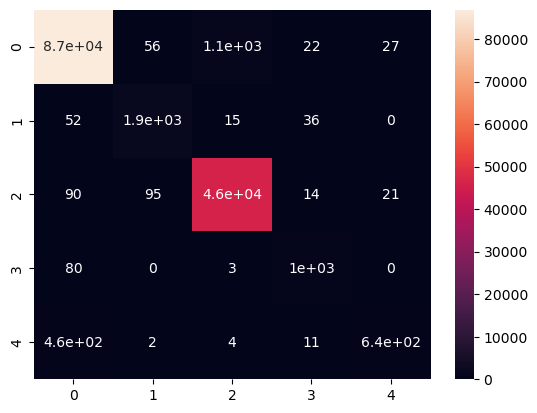

In [83]:
sns.heatmap(cm,annot=True)

In [85]:
import joblib

In [143]:
joblib.dump(mlp,'final_out.joblib')

['final_out.joblib']